# **HW1: Regression**
In *assignment 1*, you need to finish:

1.  Basic Part: Implement two regression models to predict the Systolic blood pressure (SBP) of a patient. You will need to implement **both Matrix Inversion and Gradient Descent**.


> *   Step 1: Split Data
> *   Step 2: Preprocess Data
> *   Step 3: Implement Regression
> *   Step 4: Make Prediction
> *   Step 5: Train Model and Generate Result

2.  Advanced Part: Implement one regression model to predict the SBP of multiple patients in a different way than the basic part. You can choose **either** of the two methods for this part.

# **1. Basic Part (55%)**
In the first part, you need to implement the regression to predict SBP from the given DBP


## 1.1 Matrix Inversion Method (25%)


*   Save the prediction result in a csv file **hw1_basic_mi.csv**
*   Print your coefficient


### *Import Packages*

> Note: You **cannot** import any other package

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import csv
import math
import random

### *Global attributes*
Define the global attributes

In [2]:
training_dataroot = 'hw1_basic_training.csv' # Training data file file named as 'hw1_basic_training.csv'
testing_dataroot = 'hw1_basic_testing.csv'   # Testing data file named as 'hw1_basic_training.csv'
output_dataroot = 'hw1_basic_mi.csv'         # Output file will be named as 'hw1_basic.csv'

training_datalist = pd.read_csv(training_dataroot) # Training datalist, saved as numpy array
testing_datalist = pd.read_csv(testing_dataroot)   # Testing datalist, saved as numpy array


You can add your own global attributes here


In [3]:
deg = 1 + 1
n_train = n_valid = n_test = 0
x_train = y_train = x_valid = y_valid = x_test = y_test = w = np.array([])

def MAPE(y_hat: np._typing.NDArray, y: np._typing.NDArray) -> float:
    return np.mean(np.abs((y_hat - y) / y)) * 100

### *Load the Input File*
First, load the basic input file **hw1_basic_training.csv** and **hw1_basic_testing.csv**

Input data would be stored in *training_datalist* and *testing_datalist*

In [ ]:
# Read input csv to datalist

### *Implement the Regression Model*

> Note: It is recommended to use the functions we defined, you can also define your own functions


#### Step 1: Split Data
Split data in *training_datalist* into training dataset and validation dataset
* Validation dataset is used to validate your own model without the testing data



In [4]:
def SplitData():
    global n_train, n_valid, n_test, x_train, x_valid, x_test, y_train, y_valid
    np.random.shuffle(training_datalist.values)
    n = len(training_datalist)
    n_train = n - n // 16
    n_valid = n // 16
    train_dbp = training_datalist["dbp"].to_numpy()
    train_sbp = training_datalist["sbp"].to_numpy()
    x_train, x_valid = train_dbp[:n_train], train_dbp[n_train:]
    y_train, y_valid = train_sbp[:n_train], train_sbp[n_train:]
    n_test = len(testing_datalist)
    x_test = testing_datalist["dbp"].to_numpy()


#### Step 2: Preprocess Data
Handle the unreasonable data
> Hint: Outlier and missing data can be handled by removing the data or adding the values with the help of statistics  

In [5]:
def PreprocessData():
    global x_train, y_train
    mu_x = np.mean(x_train)
    mu_y = np.mean(y_train)
    sigma_x = np.std(x_train)
    sigma_y = np.std(y_train)
    cond = np.logical_and(np.abs(x_train - mu_x) <= 3 * sigma_x, np.abs(y_train - mu_y) <= 3 * sigma_y)
    x_train, y_train = x_train[cond], y_train[cond]


#### Step 3: Implement Regression
> use Matrix Inversion to finish this part




In [6]:
def MatrixInversion():
    global w, deg
    w = np.linalg.pinv(np.vander(x_train, deg)) @ y_train
    # w = np.linalg.lstsq(np.vander(x_train, deg), y_train, None)[0]
    y_valid_hat = np.vander(x_valid, deg) @ w
    print(f"Validation loss: {MAPE(y_valid_hat, y_valid)}")
    plt.scatter(x_valid, y_valid)
    plt.scatter(x_train, y_train)
    plt.axline((0, w[-1]), slope=w[-2])


#### Step 4: Make Prediction
Make prediction of testing dataset and store the value in *output_datalist*
The final *output_datalist* should look something like this 
> [ [100], [80], ... , [90] ] where each row contains the predicted SBP

In [7]:
def MakePrediction():
    global y_test
    y_test = np.vander(x_test, deg) @ w


#### Step 5: Train Model and Generate Result

> Notice: **Remember to output the coefficients of the model here**, otherwise 5 points would be deducted
* If your regression model is *3x^2 + 2x^1 + 1*, your output would be:
```
3 2 1
```





Validation loss: 5.677749399772019


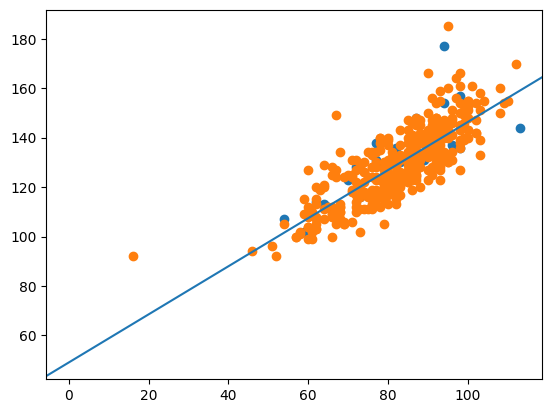

In [8]:
SplitData()
PreprocessData()
MatrixInversion()
MakePrediction()


In [9]:
print(' '.join(str(i) for i in w))


0.9732054914294743 49.02325109966294


### *Write the Output File*
Write the prediction to output csv
> Format: 'sbp'




In [10]:
np.savetxt(output_dataroot, y_test)

## 1.2 Gradient Descent Method (30%)


*   Save the prediction result in a csv file **hw1_basic_gd.csv**
*   Output your coefficient update in a csv file **hw1_basic_coefficient.csv**
*   Print your coefficient





### *Global attributes*

In [11]:
output_dataroot = 'hw1_basic_gd.csv' # Output file will be named as 'hw1_basic.csv'
coefficient_output_dataroot = 'hw1_basic_coefficient.csv'


Your own global attributes

In [12]:
valid_loss_history = []
w_history = []

### *Implement the Regression Model*


#### Step 1: Split Data

In [ ]:
# def SplitData():

#### Step 2: Preprocess Data

In [ ]:
# def PreprocessData():

#### Step 3: Implement Regression
> use Gradient Descent to finish this part

In [13]:
def GradientDescent():
    global w
    w = np.array([1., 50.])
    n = len(x_train)
    X_train = np.vander(x_train, deg)
    X_valid = np.vander(x_valid, deg)
    alpha = 1e-4 # learning rate
    for i in range(128):
        gradient = -2 / n * ((y_train - (X_train @ w)) @ X_train)
        w -= alpha * math.exp(-0.1 * i) * gradient
        w_history.append(np.copy(w))
        valid_loss = MAPE(X_valid @ w, y_valid)
        valid_loss_history.append(valid_loss)
        print(f"Epoch {i}: validation loss = {valid_loss}")
        if len(valid_loss_history) > 5 and valid_loss_history[-1] > min(valid_loss_history[-6:-1]):
            break
    if valid_loss_history[-1] > 10:
            raise Exception("Not converge in 128 epochs")
    plt.scatter(x_valid, y_valid)
    plt.scatter(x_train, y_train)
    plt.axline((0, w[-1]), slope=w[-2])

#### Step 4: Make Prediction

Make prediction of testing dataset and store the values in *output_datalist*
The final *output_datalist* should look something like this 
> [ [100], [80], ... , [90] ] where each row contains the predicted SBP

Remember to also store your coefficient update in *coefficient_output*
The final *coefficient_output* should look something like this
> [ [1, 0, 3, 5], ... , [0.1, 0.3, 0.2, 0.5] ] where each row contains the [w0, w1, ..., wn] of your coefficient





In [ ]:
# def MakePrediction():

#### Step 5: Train Model and Generate Result

> Notice: **Remember to output the coefficients of the model here**, otherwise 5 points would be deducted
* If your regression model is *3x^2 + 2x^1 + 1*, your output would be:
```
3 2 1
```



Epoch 0: validation loss = 5.982742941481881
Epoch 1: validation loss = 5.5723316348590615
Epoch 2: validation loss = 5.65264000034949
Epoch 3: validation loss = 5.641485208139689
Epoch 4: validation loss = 5.641785058415652
Epoch 5: validation loss = 5.641803682639746


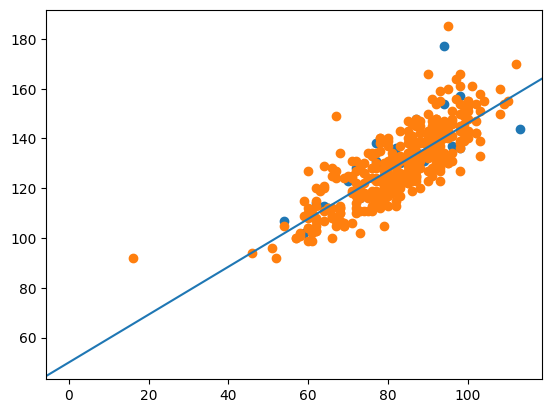

In [14]:
GradientDescent()
MakePrediction()

In [15]:
print(' '.join(str(i) for i in w))

0.9616324520524772 49.99952341064653


### *Write the Output File*

Write the prediction to output csv
> Format: 'sbp'

**Write the coefficient update to csv**
> Format: 'w0', 'w1', ..., 'wn'
>*   The number of columns is based on your number of coefficient
>*   The number of row is based on your number of iterations

In [16]:
np.savetxt(output_dataroot, y_test)
np.savetxt(coefficient_output_dataroot, w_history, delimiter=',')

# **2. Advanced Part (40%)**
In the second part, you need to implement the regression in a different way than the basic part to help your predictions of multiple patients SBP.

You can choose **either** Matrix Inversion or Gradient Descent method.

The training data will be in **hw1_advanced_training.csv** and the testing data will be in **hw1_advanced_testing.csv**.

Output your prediction in **hw1_advanced.csv**

Notice:
> You cannot import any other package other than those given



### Input the training and testing dataset

In [ ]:
training_dataroot = 'hw1_advanced_training.csv' # Training data file file named as 'hw1_basic_training.csv'
testing_dataroot = 'hw1_advanced_testing.csv'   # Testing data file named as 'hw1_basic_training.csv'
output_dataroot = 'hw1_advanced.csv' # Output file will be named as 'hw1_basic.csv'

training_datalist =  [] # Training datalist, saved as numpy array
testing_datalist =  [] # Testing datalist, saved as numpy array

output_datalist =  [] # Your prediction, should be 220 * 1 matrix and saved as numpy array
                      # The format of each row should be ['sbp']

### Your Implementation

### Output your Prediction

> your filename should be **hw1_advanced.csv**

In [ ]:
with open(output_dataroot, 'w', newline='', encoding="utf-8") as csvfile:
  writer = csv.writer(csvfile)
  for row in output_datalist:
    writer.writerow(row)

# Report *(5%)*

Report should be submitted as a pdf file **hw1_report.pdf**

*   Briefly describe the difficulty you encountered
*   Summarize your work and your reflections
*   No more than one page






# Save the Code File
Please save your code and submit it as an ipynb file! (**hw1.ipynb**)